# Kalman Filter Example

We try out the Kalman Filter for discrete time as well as the Kalman Filter for continuous time on a simple dataset. While the observations are regular and in theory, no continuous time is needed, it is still a good sanity check for the two models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import os
os.chdir('..')
from models.disc_kalman_filter import DiscreteKalmanFilter

plt.rcParams["figure.figsize"] = (20,10)

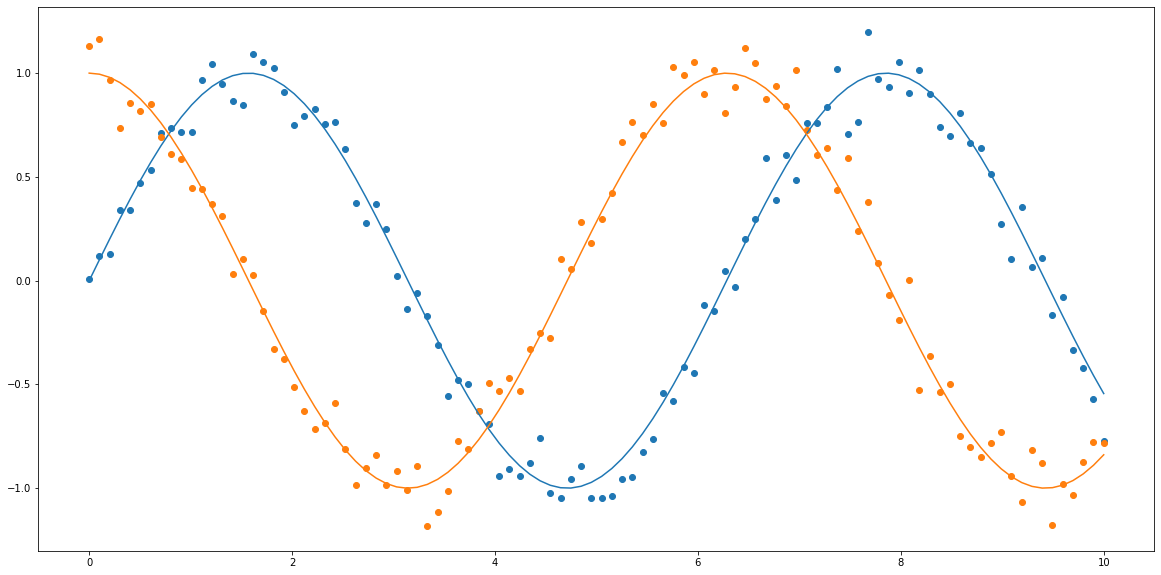

In [2]:
t = np.linspace(0, 10, 100)
y = np.stack([np.sin(t), np.cos(t)]).T + np.random.normal(0, 0.1, (100, 2))
mask = torch.ones_like(torch.Tensor(y))
plt.scatter(t, y[:,0])
plt.scatter(t, y[:,1])
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

Iter 100, loss: 1.0509
Iter 200, loss: 0.7327
Iter 300, loss: 0.5491
Iter 400, loss: 0.3290
Iter 500, loss: 0.0250


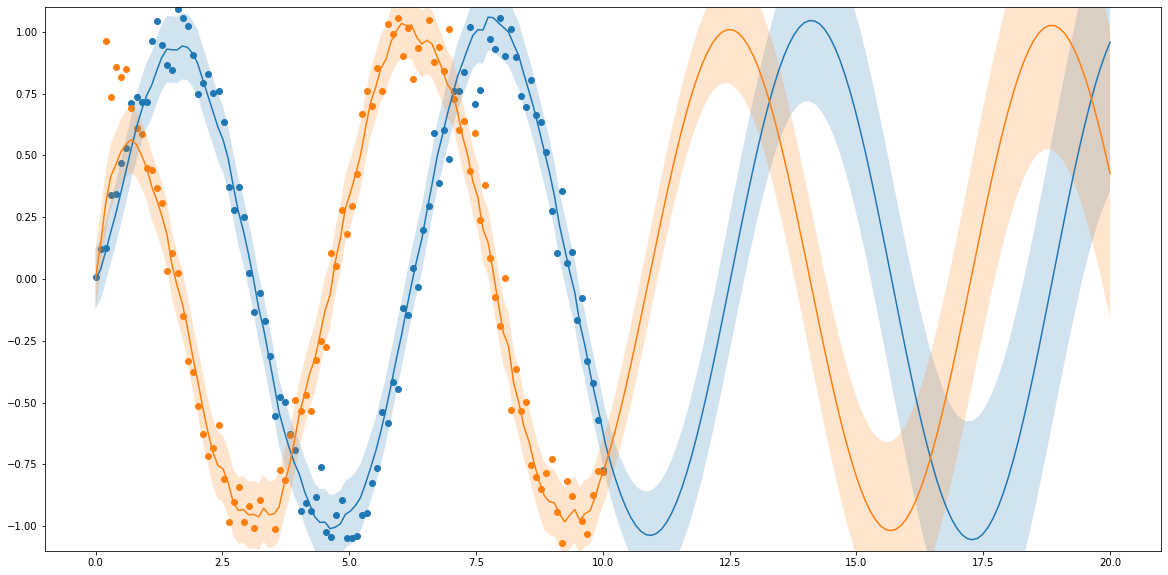

In [4]:
model = DiscreteKalmanFilter(dim=2, latent_dim=8)
optim = torch.optim.Adam(model.parameters())

for i in range(1, 501):
    optim.zero_grad()
    loss = model(torch.Tensor(y))
    if i % 100 == 0:
        print(f'Iter {i}, loss: {loss:.4f}')
    loss.backward()
    optim.step()

pred_mu_1, pred_sigma_1, x, P = model.iterate_disc_sequence(torch.Tensor(y))
pred_mu_2, pred_sigma_2 = model.forecasting(100, x, P)        
pred_mu = torch.cat([pred_mu_1, pred_mu_2]).detach().cpu().numpy()
pred_sigma = torch.cat([pred_sigma_1, pred_sigma_2]).detach().cpu().numpy()

plt.scatter(t, y[:,0], c='C0')
plt.scatter(t, y[:,1], c='C1')

plt.plot(np.linspace(0, 20, 200), pred_mu[:,0], c='C0')
plt.plot(np.linspace(0, 20, 200), pred_mu[:,1], c='C1')

plt.fill_between(np.linspace(0, 20, 200), pred_mu[:,0] - pred_sigma[:,0,0], pred_mu[:,0] + pred_sigma[:,0,0], alpha=0.2)
plt.fill_between(np.linspace(0, 20, 200), pred_mu[:,1] - pred_sigma[:,1,1], pred_mu[:,1] + pred_sigma[:,1,1], alpha=0.2)

plt.ylim(-1.1, 1.1)

plt.plot()
plt.show()